 # 목표: 전방전파가 가능한 MLP 네트워크의 구성
___
오늘의 목적은 전방전파가 가능한 MLP 네트워크 클래스를 직접 구성하는데 있습니다.

# 기초 라이브러리    
___
아래의 코드에서 사용할 모듈을 들여옵니다.    
데이터를 시각화하기위한 matplolib와 어레이 연산을 위한 numpy를 사용할 것입니다.


In [4]:
import matplotlib.pyplot as plt
import numpy as np

대부분의 numpy 함수는 임의의 형태의 array가 들어왔을 때 그 형태를 유지하면서 각각의 원소에 작용하는 형식으로 작동합니다.    
예를 들어 (10,3,4)의 형태를 가지는 z에 대해 np.exp(z)의 연산을 줘도 형태는 그대로 (10,3,4)를 유지합니다.

In [2]:
z = np.zeros((10,3,4))
print(z.shape, np.exp(z).shape)

(10, 3, 4) (10, 3, 4)


In [3]:
print(z)
print(np.exp(z))

[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]
[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]


# 함수의 정의
딥러닝 모듈을 만들기에 앞서 연습으로 다음과 같이 수학에서 사용하는 일차 함수 $y = 2x+1$를 흉내내는 함수 linear를 정의합니다.


In [7]:
def linear(z):
    return 2 * np.array(z) +1

print(linear(3))


7


위의 함수는 리스트를 입력으로 받으면 정상적으로 작동하지 않습니다.    
numpy는 원소 각각에 적용하는 함수를 쉽게 구현가능하게 해줍니다.    

In [8]:
print(linear([1,2,3]))

[3 5 7]


In [9]:
x = np.array([1,2,3])
print(linear(x))

[3 5 7]


np.arange는 등간격의 1차원 배열을 생성해 주는 함수입니다.     
일반 range와 비슷하게 np.arange(a,b,c)형태로 사용하면 a부터 b까지 c 간격의 배열을 생성합니다.    
예를 들어 np.arange(0, 10, 3)는 array([0, 3, 6, 9]) 결과를 출력합니다.          
np.arange(0, 10)는 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])를 출력합니다다.  
      
이제 np.arange(0, 10)를 함수 linear의 입력으로 사용할 경우 다음과 같은 결과를 확인할 수 있습니다.

[0 1 2 3 4 5 6 7 8 9]


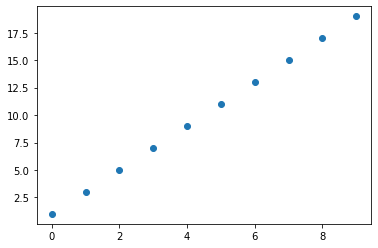

In [7]:
z = np.arange(0, 10)
print(z)
plt.scatter(z, linear(z))
plt.show()

우리는 정해진 함수를 사용하는 것이 아니고 파라미터를 변경해서 사용해야 합니다.     
직관적으로는 다음과 같이 파라미터를 입력으로 추가로 받아들이는 경우를 생각해볼 수 있습니다. 

In [8]:
def linear_parameter(z, a=1):
    return a * z +1

print(linear_parameter(3, a=3))

10


기울기가 2로 고정되어 있는 linear와 기울기를 바꿀 수 있는 linear_parameter에 기울기를 3을 주고 비교해서 그리면 다음과 같습니다.

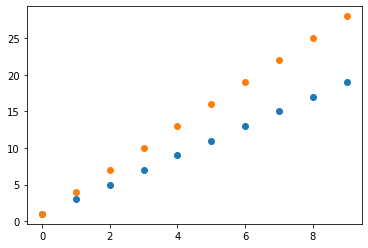

In [9]:
z = np.arange(0, 10)
plt.scatter(z, linear(z))
plt.scatter(z, linear_parameter(z, a=3))
plt.show()

linear_parameter에 기울기를 1을 주고 비교해서 그리면 다음과 같습니다.

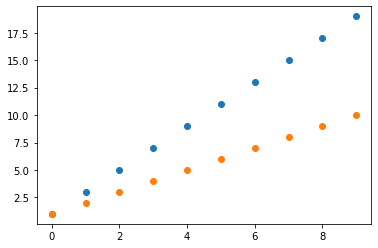

In [10]:
z = np.arange(0, 10)
plt.scatter(z, linear(z))
plt.scatter(z, linear_parameter(z, a= 1))
plt.show()

# 파라미터를 저장하는 클래스
이제 위의 함수를 이용해서 파라미터를 변경할 수 있는 모듈의 클래스를 만들고자 합니다.  
함수의 경우 입력을 하고 난 후 출력을 내보낸뒤 바로 함수가 소멸해 버립니다.    
이에 비해 클래스의 경우 한 번 생성되면 소멸하지 않고 계속 파라미터를 안에 가지고 있기 때문에 함수를 학습하는데 있어 적합합니다.    
    

이 클래스에 2개의 메소드를 정의했습니다. 하나는 \_\_init\_\_ 메소드입니다. \_\_init\_\_은 클래스의 instance가 처음 생성될 때 작동하는 함수입니다.  
우리의 모델에서는 init에서 파라미터를 초기화해주었습니다.    
다음으로는 forward 메소드가 있습니다. 이 함수에 값이 입력되었을 때 어떤 값이 출력되는지를 결정하는 핵심적인 부분입니다.

In [11]:
class Linear_Module():
    def __init__(self):
        self.a = 0
    def forward(self, x):
        return linear_parameter(x, a = self.a)


한번 모듈을 정의하면 지속적으로 파라미터를 업그레이드하면서 목적으로 하는 함수를 찾을 수 있습니다.

0


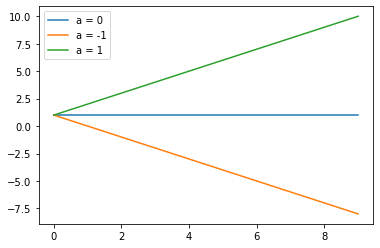

In [12]:
linear = Linear_Module()
z = np.arange(0, 10)
plt.plot(z, linear.forward(z), label = 'a = 0')
print(linear.a) 
linear.a = - 1
plt.plot(z, linear.forward(z), label = 'a = -1')
linear.a = 1
plt.plot(z, linear.forward(z), label = 'a = 1')
plt.legend()
plt.show()

# MLP 모듈
이제 본격적으로 MLP 모듈을 만들고자 합니다.   
들어가기에 앞서서 파라미터를 초기화해주는 과정에 대한 이해가 필요합니다.    
앞 선 linear 모듈의 경우에는 함수의 기울기 파라미터 a를 self.a = 0로 초기화해주었습니다.    
실제 딥러닝 학습에서도 어떻게 파라미터를 초기화하는지에 따라 진짜 함수를 찾는 속도가 매우 달라지게 됩니다.  
예를 들어 진짜 데이터의 기울기는 3에 가깝다고 가정해 봅시다.    
이런 경우에 기울기 100으로 초기화를 하면 기울기가 100에서 3으로 작아지는 데는 매우 오랜 시간이 걸릴 것입니다.    
하지만 기울기가 -1~1 근처에서 시작한다면 상대적으로 짧은 시간안데 진짜 기울기 3을 찾아갈 수 있습니다.    
    
앞서 정의한 Linear_Module의 초기화 부분을 다음과 같이 수정합니다.


In [10]:
임의값의 행렬 생성 및 초기화

SyntaxError: invalid syntax (<ipython-input-10-056953cee00c>, line 1)

In [13]:
class Linear_Module():
    def __init__(self):
        self.a = np.random.randn()
    def forward(self, x):
        return linear_parameter(x, a = self.a)

np.random 은 numpy에서 랜덤하게 값을 샘플링하게 해주는 모듈입니다.  
np.random.randn 의 경우 정규분포를 샘플링해줍니다.  
입력값으로는 샘플링하고자 하는 크기를 지정해줘야합니다.  
정규분포는 자연의 근원적인 분포이기 때문에 딥러닝에서도 광범위하게 사용됩니다.

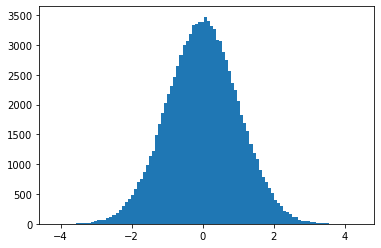

In [31]:
random_sampled = (np.random.randn(100000)) #sample 100000 samples from normal distribution 

plt.hist(random_sampled, bins = 100)
plt.show()

이제 딥러닝 학습을 위해 인공신경망을 정의해야 합니다.     
앞서 수업에서 언급했듯이 인공신경망은 행렬곱과 활성화함수가 번갈하가면서 합성되는 형태로 이루어져있습니다.    
먼저 다음과 같은 활성화 함수들을 정의할 수 있습니다.    
시그모이드 함수와 ReLU함수 두가지를 정의하였습니다.   

# 여러 활성화 함수의 구현
## 시그모이드 함수 $f(x) = \frac{1}{1+e^{-x}}$
## ReLU 함수     $f(x) =  \begin{cases} x &      \text{if $x>0$} \\ 0 &\text{if $x<0$} \end{cases}$ 
## tanh 함수      $\text{tanh}(x) = \frac{e^x + e^{-x}}{e^x - e^{-x}}$
## 계단 함수 $f(x) =  \begin{cases} 1 &      \text{if $x>0$} \\ 0 &\text{if $x<0$} \end{cases}$ 

In [121]:
def sigmoid(z):
    z = np.array(z)
    return 1/(1 + np.exp(-z))

def ReLU(x):
    x = np.array(x)
    return x * (x > 0)

def no_activation(x):
     x = np.array(x)
    return x

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 11)

In [56]:
ReLU([-1,1,2,2])

array([0, 1, 2, 2])

In [61]:
def tanh(x):
    x = np.array(x)
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

def step_function(x):
    x = np.array(x)
    return (x>0).astype(int)

In [77]:
tanh([20,22,12,16])

array([1., 1., 1., 1.])

In [72]:
a.astype(int)

array([1, 1, 1])

앞에서 언급한 linear에서는 인스턴스를 정의하는데 아무것도 입력으로 사용하지 않았습니다.    
하지만 인공신경망을 정의할 때 데이터의 형태와 목적에 따라 다양한 구조를 가지는 인공신경망이 있을 수 있는데 이를 모두 다루기 위해서는 그 때 그 때 신경망의 구조를 입력으로 받을 필요가 있습니다다.    
우리의 경우에는 중간층의 노드 개수 sizes를 입력으로 받게 정의하였습니다.   
sizes = [3,4,5,2]를 예시로 들면 3차원 데이터를 입력으로 받아 중간 층에서 4개의 노드, 5개의 노드가 있는 층을 거친 후 최종적으로 2차원의 출력을 내보내는 MLP를 정의하게 됩니다.

In [90]:
class MLP_Network1:
    def __init__(self, sizes = [3, 5], activation = ReLU):
        self.sizes = sizes
        self.weight = np.random.randn(5, 3)
        self.bias = np.random.randn(5)
        self.activation = ReLU
        
    def Hidden_layer1(self, x):
        z = np.matmul(self.weight, x) + self.bias
        r = self.activation(z)
        return Out_Put(r)
    
    def Out_Put(self, x):
        weight = np.random.randn(5, 2)
        bias = np.random.randn(2)
        z = np.matmul(self.weight, x) + self.bias
        r = self.activation(z)
        return r
        
    def forward(self, x):
        return Hidden_layer1(x)

In [91]:
mlp = MLP_Network1([3,2], activation = ReLU)

In [92]:
mlp.forward(np.array([-100, 0, 0]))

NameError: name 'Hidden_layer1' is not defined

In [116]:
class MLP_Network2:
    def __init__(self, sizes = [3, 2, 4], activation = ReLU):
        self.sizes = sizes
        self.weights = [ np.random.randn(sizes[1], sizes[0]), np.random.randn(sizes[2], sizes[1]) ]
        self.biases = [ np.random.randn(sizes[1]), np.random.randn(sizes[2])]
        self.activation = activation
        
    def forward(self, x):
        z = np.matmul(self.weights[0], x) + self.biases[0]
        z = self.activation(z)
        z2 =  np.matmul(self.weights[1], z) + self.biases[1]
        return z2

In [117]:
mlp2 = MLP_Network2()

In [118]:
mlp2.forward(np.array([-100,0,0]))

array([-98.58228035,  50.24251103,  69.66190741,  47.39508751])

In [127]:
class MLP_Network:
    def __init__(self, sizes, activation = ReLU, Last_activation= softmax):
        self.sizes = sizes
        self.weights = []
        self.biases = []
        for i in range(1, len(sizes)):
            self.weights.append(np.random.randn(self.sizes[i], self.sizes[i-1]))
            self.biases.append(np.random.randn(self.sizes[i]))
        self.activation = activation
        self.Last_activation = Last_activation
        
    def forward(self, x):
        z = x
        for i in range(len(self.sizes)-1):
            z = np.matmul(self.weights[i], z) + self.biases[i]
            if i == len(self.sizes)-2:
                z = self.Last_activation(z)
            else:
                z = self.activation(z)
        return z
    
net = MLP_Network([2, 3, 6, 4, 10, 10])

In [128]:
net.forward(np.array([-100,0,0]))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)

In [18]:
net.forward(np.zeros((2)))

array([0.42414312, 0.16163131, 0.04522815, 0.23473492, 0.05998429,
       0.04124827, 0.44047455, 0.98089274, 0.89042946, 0.66009121])

어떤 활성화 함수를 사용할지를 미리 정하고 싶으면 다음과 같이 init단계에 입력으로 사용하게 변형할 수 있습니다.

In [143]:
class MLP_Network:
    def __init__(self, sizes, activation_function = ReLU, last_activation = softmax):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y) for y in sizes[1:]]
        self.weights = []
        for i in range(self.num_layers-1):
            self.weights.append(np.random.randn(self.sizes[i+1], self.sizes[i]))
        self.activation_function = activation_function
        self.last_activation = last_activation
    def forward(self, a):
        for bias, weight in zip(self.biases, self.weights):
            a = self.activation_function(np.dot(weight, a)+bias)
        return a
net = MLP_Network([2, 3, 6, 4, 10, 10], activation_function = sigmoid)

In [20]:
net.forward(np.zeros((2)))

array([0.35650355, 0.11204108, 0.00751557, 0.98552186, 0.48954448,
       0.51975763, 0.08625619, 0.40650833, 0.21959457, 0.30520391])

분류를 위해서는 소프트맥스 함수를 사용합니다.     

In [21]:
def softmax_temp(z): 
    return np.exp(z) / np.sum(np.exp(z))

하지만 이 방법은 수치적으로 불안정합니다.

In [22]:
softmax_temp([100000, 1000001])

/home/hgh2134/anaconda3/envs/proj/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hgh2134/anaconda3/envs/proj/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([nan, nan])

이를 개선하기 위해 다음과 같은 수치적으로 안정적인 소프트맥스를 다음과 같이 구현할 수 있습니다.

In [122]:
def softmax(z):
    y = z- np.max(z)
    return np.exp(y) / np.sum(np.exp(y))

In [36]:
softmax([100000, 1000001])

array([0., 1.])

마지막 층의 활성화함수가 소프트맥스인 MLP_Netwokr를 정의하기 위해 마지막 층의 활성화함수만을 따로 입력으로 받는 네트워크를 다음과 같이 정의할 수 있습니다.

In [25]:
class MLP_Network:
    def __init__(self, sizes, activation_function = ReLU, last_activation = no_activation):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y) for y in sizes[1:]]
        self.weights = []
        for i in range(self.num_layers-1):
            self.weights.append(np.random.randn(self.sizes[i+1], self.sizes[i]))
        self.activation_function = ReLU
        self.last_activation = last_activation
    def forward(self, a):
        for i, [bias, weight] in enumerate(zip(self.biases, self.weights)):
            if i == self.num_layers - 2:
                activation = self.last_activation
            else:
                activation = self.activation_function
            a = activation(np.matmul(weight, a)+bias)
            
        return a
    
net = MLP_Network([2, 3, 6, 4, 10, 10], activation_function = sigmoid)
print(net.forward(np.random.randn((2))))

net = MLP_Network([2, 3, 6, 4, 10, 10], activation_function = sigmoid, last_activation = softmax)
output = net.forward(np.random.randn((2)))
print(output)
print(np.sum(output))

[ -2.60256522  -2.15516415 -18.87239588  -9.4753635    7.71170331
  -2.89978697   6.88237318  -6.45716514 -15.76394305   7.69851276]
[0.08301411 0.08216389 0.10065352 0.08174171 0.10055945 0.08164766
 0.08206553 0.22190818 0.08453371 0.08171224]
1.0


# 손실함수
해당 함수가 얼마나 적합한 결과를 내보내는 지를 측정하는 수치로 손실 함수를 사용합니다.    
먼저 다음과 같이 l2 손실함수와 교차 엔트로피 손실함수를 다음과 같이 정의합니다.    
소프트맥스와 마찬가지로 교차 엔트로피 함수도 안정적인 버전을 다음과 같이 만들 수 있습니다.

In [26]:
def l2_loss(x,y):
    return np.sum((x-y)**2)

def l1_loss(x,y):
    return np.sum(np.abs(x-y))

def cross_entropy_loss_temp(x,y):
    return -np.sum(y*np.log(x))

def cross_entropy_loss(x,y):
    epsilon = 1e-8
    return -np.sum(y*np.log(x + epsilon))

이제 원하는 데이터를 입력으로 받기 위해 데이터를 읽어들여 모듈에 입력시키는 클래스  mnist_dataset을 다음과 같이 정의합니다.    
https://drive.google.com/file/d/1e2QUgaRp4Dovj-3QKfUsuzmHzxhsb9Bc/view?usp=sharing

In [173]:
import os, cv2
class mnist_dataset():
    def __init__(self, path):
        data_list = []
        for label in os.listdir(path):
            label_path = os.path.join(path, str(label))
            file_list = os.listdir(label_path)
            for file in file_list:
                data_list.append([os.path.join(label_path, file), label])
        self.data_list = data_list
        
    def __len__(self):
        return len(self.data_list)
    
    def __getitem__(self, i):
        png_path, label = self.data_list[i]
        img_loaded = cv2.imread(png_path, cv2.IMREAD_GRAYSCALE)
        img_loaded = img_loaded / 255.               #데이터 정규화
        return img_loaded.reshape(-1), label

In [181]:
import os, cv2
class mnist_dataset():
    def __init__(self, path):
        data_list = []
        for label in range(10):
            label_path = os.path.join(path, str(label))
            file_list = os.listdir(label_path)
            data_list += [[os.path.join(label_path, file), label] for file in file_list]
        self.data_list = data_list
    def __len__(self):
        return len(self.data_list)
    def __getitem__(self, i):
        png_path, label = self.data_list[i]
        img_loaded = cv2.imread(png_path, cv2.IMREAD_GRAYSCALE)
        return img_loaded.reshape(-1)/255, label

In [182]:
training_dataset = mnist_dataset('../mnist_png/training/')
test_dataset = mnist_dataset('../mnist_png/testing/')

In [183]:
test_img = training_dataset[10]

In [184]:
import matplotlib.pyplot as plt

In [185]:
test_img = test_data[0]

NameError: name 'test_data' is not defined

In [186]:
test_label = test_data[1]

NameError: name 'test_data' is not defined

In [179]:
test_label

NameError: name 'test_label' is not defined

c:\users\tjgus\anaconda3\envs\py36\lib\site-packages\matplotlib\cbook\__init__.py:682: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x = np.array(x, subok=True, copy=copy)


TypeError: Image data of dtype object cannot be converted to float

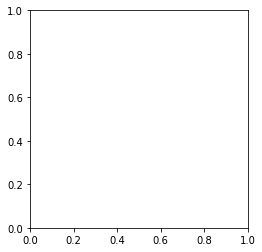

In [180]:
plt.imshow(test_img, cmap = 'gray')
plt.show()

In [144]:
net = MLP_Network([784, 128, 128, 10], activation_function = sigmoid, last_activation = softmax)

(784,)
0


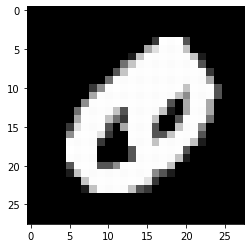

In [145]:
img, label = training_dataset[0]
print(img.shape)
plt.imshow(training_dataset[2][0].reshape(28,28), cmap='gray')
print(label)

원핫 인코딩을 만들기 위해 다음과 같은 항등행렬을 준비합니다.    
이 행렬의 i 번째 행이 i번째 원소가 1인 원핫 인코딩이 됩니다.

In [146]:
eye = np.eye(10)
print(eye)
print(eye[7])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


# 정확도
함수가 얼마나 잘 예측하는 지를 다음과 같은 방식의 분류 정확도를 측정함으로써 알 수 있습니다.

In [187]:
num_correct = 0
for i, [img, label] in enumerate(training_dataset):
    y = eye[label]
    y_hat = net.forward(img)
    if np.argmax(y_hat) == label:
        num_correct += 1
print(f'Accuracy is {num_correct/len(training_dataset)}' )

Accuracy is 0.09273333333333333


In [ ]:
tqdm

이를 클래스 내의 메소드로 구현하면 다음과 같습니다.

In [34]:
class MLP_Network:
    def __init__(self, sizes, activation_function = ReLU, last_activation = no_activation):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y) for y in sizes[1:]]
        self.weights = []
        for i in range(self.num_layers-1):
            self.weights.append(np.random.randn(self.sizes[i+1], self.sizes[i]))
        self.activation_function = ReLU
        self.last_activation = last_activation
        
    def forward(self, a):
        for i, [bias, weight] in enumerate(zip(self.biases, self.weights)):
            if i == self.num_layers - 2:
                activation = self.last_activation
            else:
                activation = self.activation_function
            a = activation(np.dot(weight, a)+bias)
            
        return a
    
    def accuracy(self,dataset):
        eye = np.eye(self.sizes[-1])
        num_correct = 0
        for i, [img, label] in enumerate(dataset):
            y = eye[label]
            y_hat = self.forward(img)
            if np.argmax(y_hat) == label:
                num_correct += 1
        val_accuracy = num_correct/len(dataset)
        print(f'Accuracy is {val_accuracy}' )
        return val_accuracy
        